In [37]:
# data comes from ECDC: https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide
# alternative source for italy-only data would be this one: https://github.com/pcm-dpc/COVID-19

import pandas as pd
import datetime as dt

try: 
    # see if today's data is available:
    today = dt.datetime.today().strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+today+'.xlsx')
except:
    # otherwise get yesterday's data:
    yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
    df0 = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'+yesterday+'.xlsx')

df0.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-04-25,25,4,2020,70,1,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-04-24,24,4,2020,105,2,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-04-23,23,4,2020,84,4,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-04-22,22,4,2020,61,1,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-04-21,21,4,2020,35,2,Afghanistan,AF,AFG,37172386.0,Asia


In [38]:
# remove duplicated values 
df0 = df0[~df0[['dateRep','countriesAndTerritories']].duplicated()]
# pivot
df = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='cases')
df.fillna(0,inplace=True)
df.tail(5)

countriesAndTerritories,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua_and_Barbuda,Argentina,Armenia,Aruba,...,United_Republic_of_Tanzania,United_States_Virgin_Islands,United_States_of_America,Uruguay,Uzbekistan,Venezuela,Vietnam,Yemen,Zambia,Zimbabwe
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-21,35.0,22.0,89.0,4.0,0.0,0.0,0.0,90.0,62.0,0.0,...,0.0,1.0,28065.0,7.0,92.0,0.0,0.0,0.0,4.0,0.0
2020-04-22,61.0,25.0,93.0,0.0,0.0,0.0,1.0,112.0,72.0,0.0,...,84.0,0.0,37289.0,8.0,35.0,29.0,0.0,0.0,0.0,3.0
2020-04-23,84.0,25.0,99.0,6.0,0.0,0.0,0.0,144.0,50.0,3.0,...,31.0,0.0,17588.0,6.0,24.0,3.0,0.0,0.0,9.0,0.0
2020-04-24,105.0,29.0,97.0,1.0,1.0,0.0,0.0,147.0,73.0,0.0,...,0.0,0.0,26543.0,8.0,62.0,10.0,2.0,0.0,2.0,1.0
2020-04-25,70.0,15.0,120.0,7.0,0.0,0.0,0.0,0.0,81.0,0.0,...,15.0,0.0,21352.0,6.0,58.0,20.0,2.0,0.0,8.0,0.0


In [39]:
# select only columns with totals greater than 1000
df2 = df[df.columns[df.sum()>20000]]
df2.sum().sort_values(ascending=False)

countriesAndTerritories
United_States_of_America    890524.0
Spain                       219764.0
Italy                       192994.0
Germany                     152438.0
United_Kingdom              143464.0
France                      122577.0
Turkey                      104912.0
Iran                         88194.0
China                        83899.0
Russia                       68622.0
Brazil                       52995.0
Belgium                      44293.0
Canada                       43877.0
Netherlands                  36535.0
Switzerland                  28595.0
India                        24506.0
Portugal                     22797.0
Peru                         21648.0
dtype: float64

In [40]:
# reorder the columns
df2 = df2[df2.sum().sort_values(ascending=False).index]
df2.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,United_Kingdom,France,Turkey,Iran,China,Russia,Brazil,Belgium,Canada,Netherlands,Switzerland,India,Portugal,Peru
dateRep,,,,,,,,,,,,,,,,,,
2020-04-21,28065.0,4266.0,2256.0,1785.0,4676.0,2051.0,4674.0,1294.0,32.0,4268.0,1927.0,1487.0,2046.0,750.0,168.0,1335.0,657.0,697.0
2020-04-22,37289.0,3968.0,2729.0,2237.0,4301.0,2667.0,4611.0,1297.0,15.0,5642.0,2498.0,973.0,1590.0,729.0,155.0,1384.0,516.0,1512.0
2020-04-23,17588.0,4211.0,3370.0,2352.0,4451.0,1827.0,3083.0,1194.0,12.0,5236.0,2678.0,933.0,1766.0,708.0,205.0,1409.0,603.0,1413.0
2020-04-24,26543.0,4635.0,2646.0,2337.0,4583.0,1653.0,3116.0,1030.0,8.0,4774.0,3735.0,908.0,1920.0,887.0,228.0,1684.0,371.0,1664.0
2020-04-25,21352.0,6740.0,3021.0,2055.0,5386.0,1773.0,3122.0,1168.0,15.0,5849.0,3503.0,1496.0,1778.0,806.0,181.0,1429.0,444.0,734.0


In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
# calculate first and last date to show on plot:
first_date = df2.index.min() + dt.timedelta(days=14)
last_date  = df2.index.max() + dt.timedelta(days=21)
date_range = [first_date,last_date]

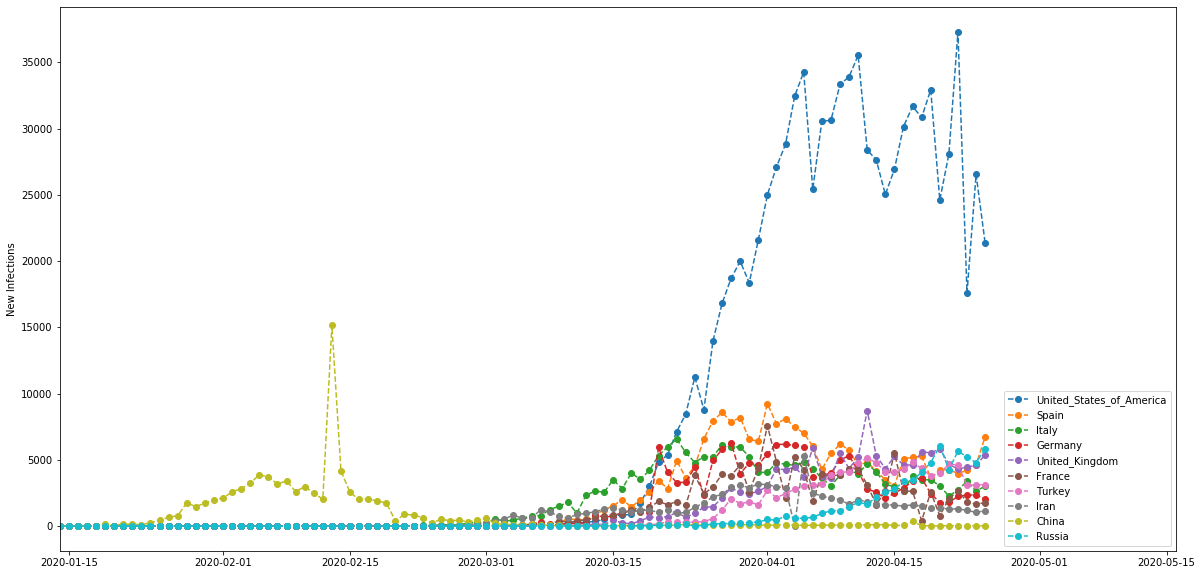

In [42]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10],'o--')
plt.ylabel("New Infections")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

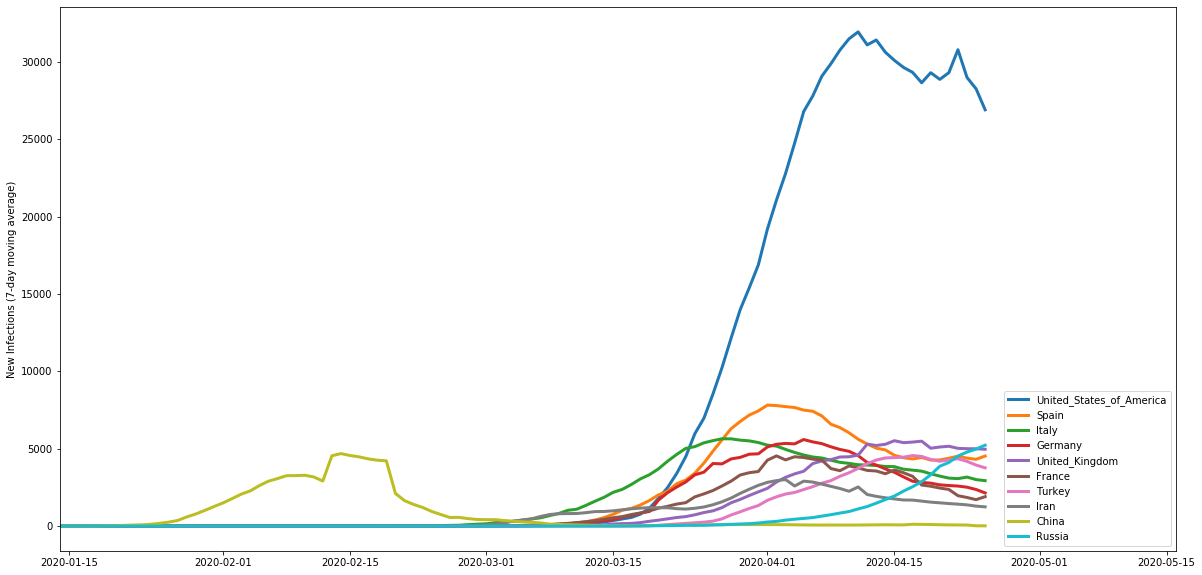

In [43]:
plt.figure(figsize=(20,10))
plt.plot(df2.iloc[:,:10].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Infections (7-day moving average)")
plt.xlim(date_range)
plt.legend(df2.columns.values,loc=4);

In [44]:
df2cum = df2.cumsum()
df2cum.tail()

countriesAndTerritories,United_States_of_America,Spain,Italy,Germany,United_Kingdom,France,Turkey,Iran,China,Russia,Brazil,Belgium,Canada,Netherlands,Switzerland,India,Portugal,Peru
dateRep,,,,,,,,,,,,,,,,,,
2020-04-21,787752.0,200210.0,181228.0,143457.0,124743.0,114657.0,90980.0,83505.0,83849.0,47121.0,40581.0,39983.0,36823.0,33405.0,27826.0,18600.0,20863.0,16325.0
2020-04-22,825041.0,204178.0,183957.0,145694.0,129044.0,117324.0,95591.0,84802.0,83864.0,52763.0,43079.0,40956.0,38413.0,34134.0,27981.0,19984.0,21379.0,17837.0
2020-04-23,842629.0,208389.0,187327.0,148046.0,133495.0,119151.0,98674.0,85996.0,83876.0,57999.0,45757.0,41889.0,40179.0,34842.0,28186.0,21393.0,21982.0,19250.0
2020-04-24,869172.0,213024.0,189973.0,150383.0,138078.0,120804.0,101790.0,87026.0,83884.0,62773.0,49492.0,42797.0,42099.0,35729.0,28414.0,23077.0,22353.0,20914.0
2020-04-25,890524.0,219764.0,192994.0,152438.0,143464.0,122577.0,104912.0,88194.0,83899.0,68622.0,52995.0,44293.0,43877.0,36535.0,28595.0,24506.0,22797.0,21648.0


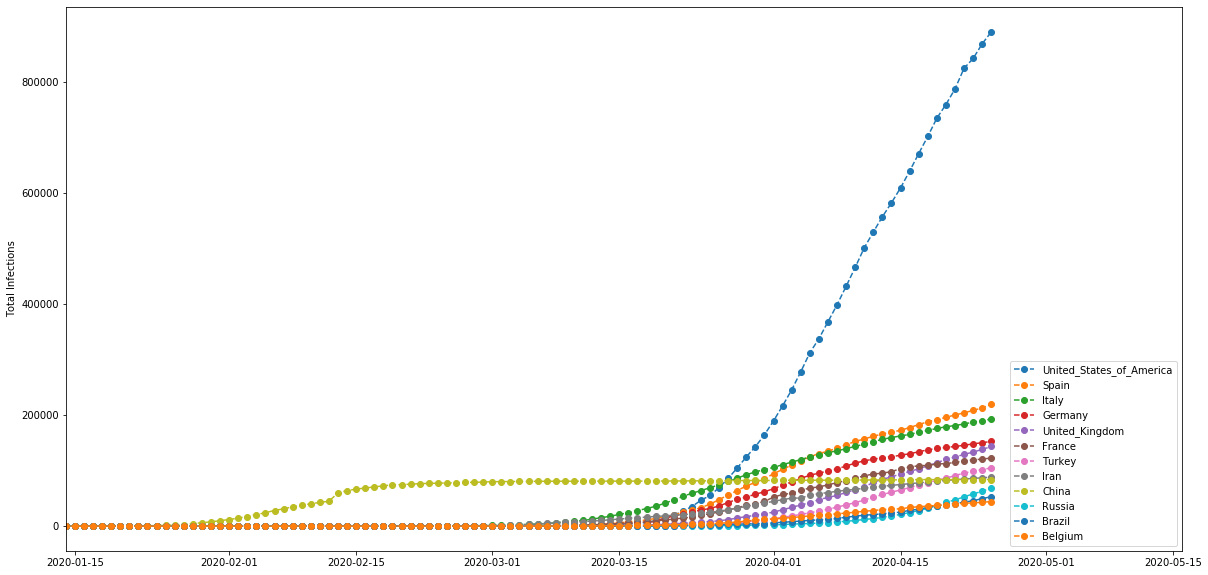

In [45]:
plt.figure(figsize=(20,10))
plt.plot(df2cum.iloc[:,:12],'o--')
plt.ylabel("Total Infections")
plt.xlim(date_range)
plt.legend(df2cum.columns.values,loc=4);

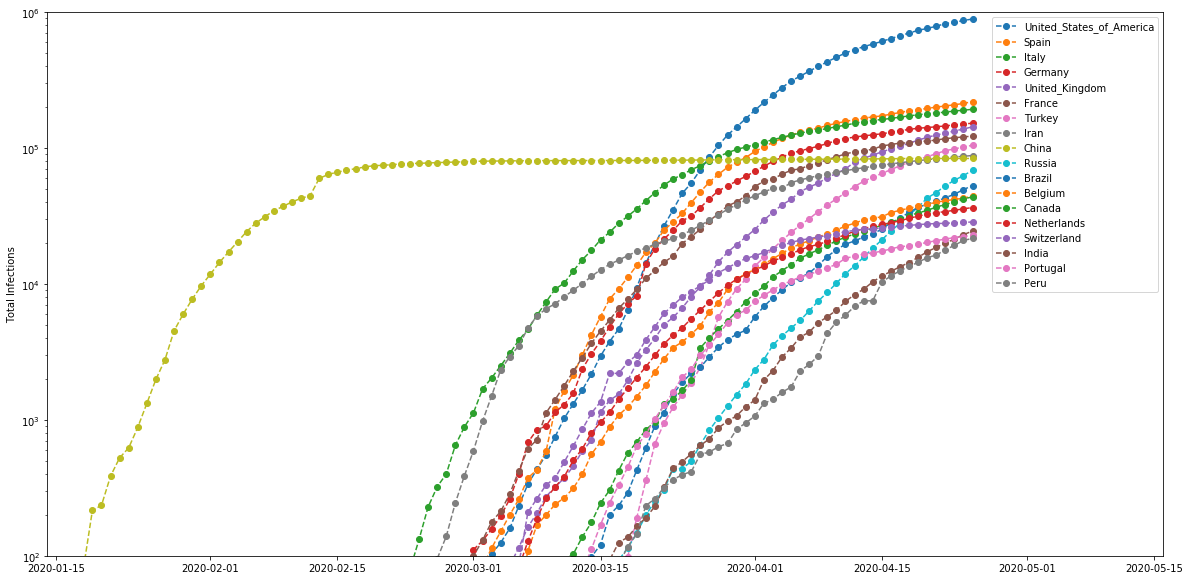

In [46]:
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.ylim([100,1000000])
plt.ylabel("Total Infections")
plt.plot(df2cum.iloc[:,:32],'o--')
plt.xlim(date_range)
plt.legend(df2cum.columns.values);

In [47]:
# now look at the mortality data
df_deaths = df0.pivot(index='dateRep',columns='countriesAndTerritories',values='deaths')
df_deaths.fillna(0,inplace=True)
df_deaths = df_deaths[df_deaths.columns[df_deaths.sum()>100]]
df_deaths = df_deaths[df_deaths.sum().sort_values(ascending=False).index]
df_deaths.tail(7)

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Iran,Germany,China,Netherlands,...,Norway,Finland,Chile,Argentina,Morocco,Panama,Serbia,Bangladesh,Greece,Saudi_Arabia
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-19,1856.0,480.0,565.0,642.0,888.0,290.0,73.0,184.0,0.0,142.0,...,12.0,8.0,10.0,10.0,2.0,4.0,7.0,9.0,0.0,5.0
2020-04-20,1772.0,433.0,410.0,395.0,596.0,230.0,87.0,110.0,0.0,83.0,...,6.0,4.0,7.0,2.0,4.0,6.0,5.0,7.0,5.0,5.0
2020-04-21,1857.0,454.0,399.0,547.0,449.0,145.0,91.0,194.0,0.0,67.0,...,0.0,4.0,6.0,8.0,2.0,10.0,3.0,10.0,6.0,6.0
2020-04-22,2524.0,534.0,430.0,531.0,828.0,170.0,88.0,281.0,0.0,165.0,...,9.0,43.0,8.0,9.0,2.0,5.0,0.0,9.0,5.0,6.0
2020-04-23,1721.0,437.0,435.0,544.0,763.0,264.0,94.0,215.0,0.0,138.0,...,6.0,8.0,13.0,8.0,4.0,3.0,9.0,10.0,0.0,5.0
2020-04-24,3179.0,464.0,440.0,516.0,638.0,228.0,90.0,227.0,0.0,123.0,...,11.0,23.0,8.0,6.0,6.0,2.0,5.0,7.0,4.0,7.0
2020-04-25,1054.0,420.0,367.0,389.0,768.0,189.0,93.0,179.0,0.0,112.0,...,11.0,5.0,6.0,2.0,3.0,8.0,5.0,4.0,5.0,6.0


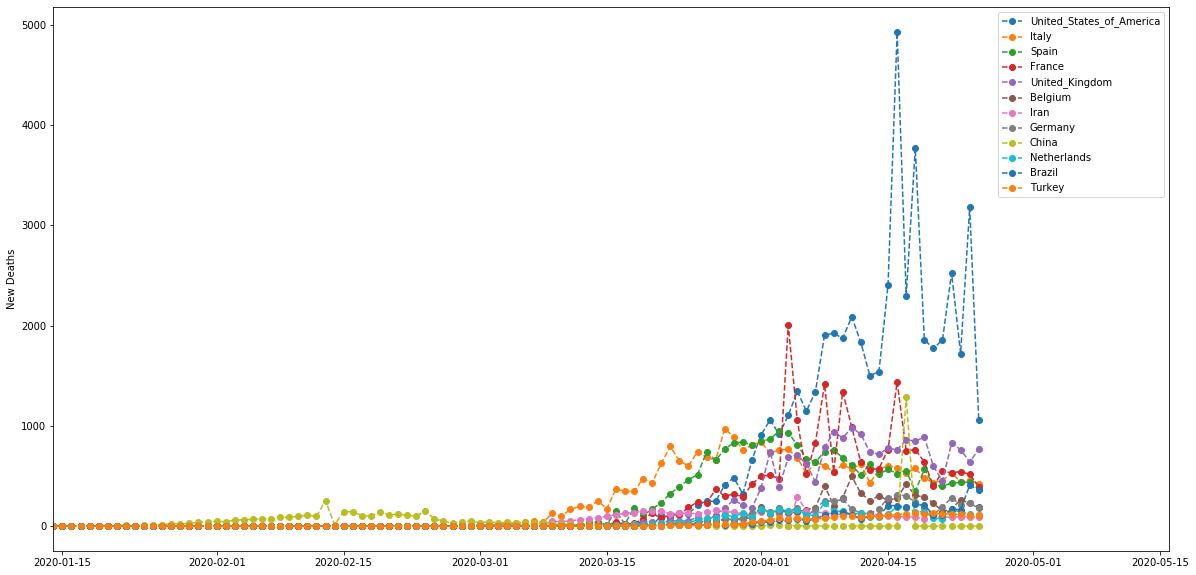

In [48]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12],'o--')
plt.ylabel("New Deaths")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

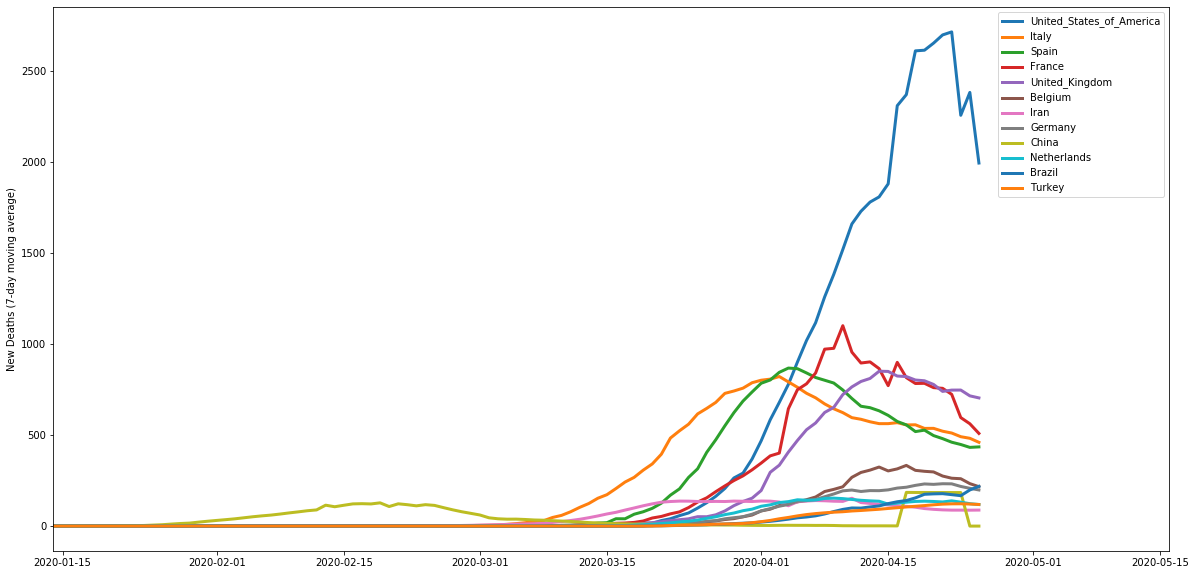

In [49]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths.iloc[:,:12].rolling(window=7).mean(),linewidth=3)
plt.ylabel("New Deaths (7-day moving average)")
plt.xlim(date_range)
plt.legend(df_deaths.columns.values,loc=1);

In [50]:
df_deaths_cum = df_deaths.cumsum()
df_deaths_cum.tail()

countriesAndTerritories,United_States_of_America,Italy,Spain,France,United_Kingdom,Belgium,Iran,Germany,China,Netherlands,...,Norway,Finland,Chile,Argentina,Morocco,Panama,Serbia,Bangladesh,Greece,Saudi_Arabia
dateRep,,,,,,,,,,,,,,,,,,,,,
2020-04-21,42539.0,24114.0,20852.0,20265.0,16509.0,5828.0,5209.0,4598.0,4636.0,3751.0,...,154.0,98.0,139.0,142.0,143.0,136.0,125.0,101.0,116.0,103.0
2020-04-22,45063.0,24648.0,21282.0,20796.0,17337.0,5998.0,5297.0,4879.0,4636.0,3916.0,...,163.0,141.0,147.0,151.0,145.0,141.0,125.0,110.0,121.0,109.0
2020-04-23,46784.0,25085.0,21717.0,21340.0,18100.0,6262.0,5391.0,5094.0,4636.0,4054.0,...,169.0,149.0,160.0,159.0,149.0,144.0,134.0,120.0,121.0,114.0
2020-04-24,49963.0,25549.0,22157.0,21856.0,18738.0,6490.0,5481.0,5321.0,4636.0,4177.0,...,180.0,172.0,168.0,165.0,155.0,146.0,139.0,127.0,125.0,121.0
2020-04-25,51017.0,25969.0,22524.0,22245.0,19506.0,6679.0,5574.0,5500.0,4636.0,4289.0,...,191.0,177.0,174.0,167.0,158.0,154.0,144.0,131.0,130.0,127.0


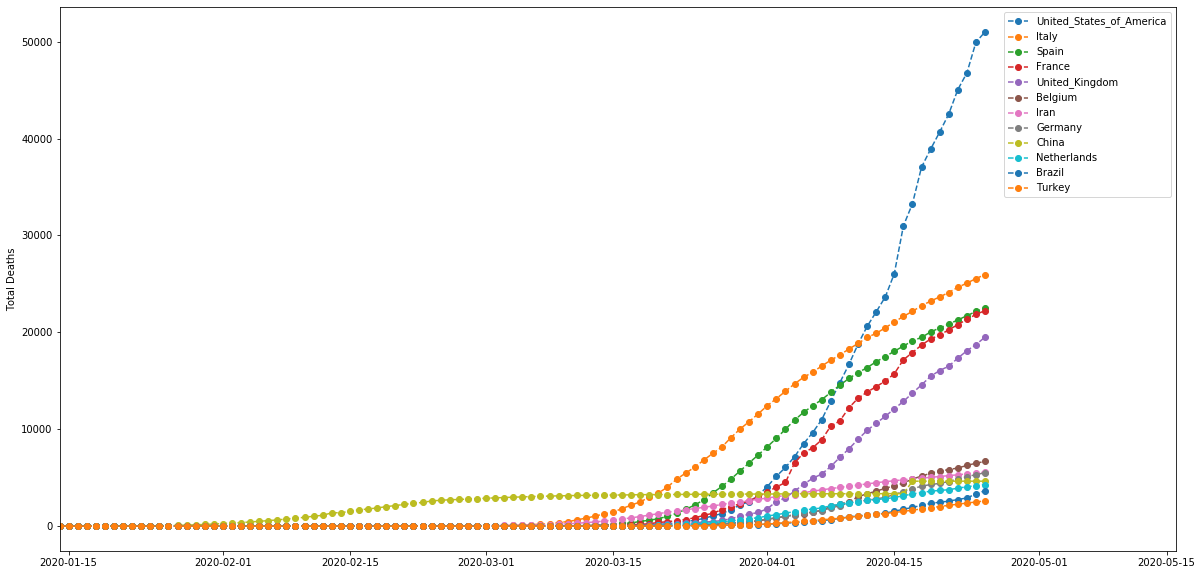

In [51]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:12],'o--')
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values,loc=1);

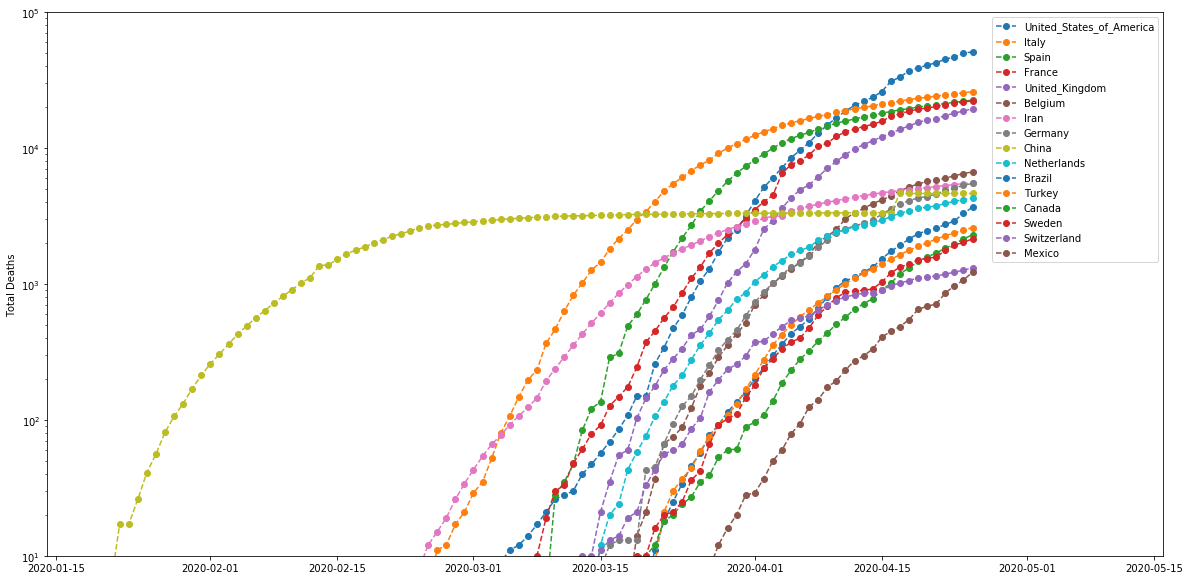

In [52]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum.iloc[:,:16],'o--')
plt.yscale('log')
plt.ylim([10,100000])
plt.ylabel("Total Deaths")
plt.xlim(date_range)
plt.legend(df_deaths_cum.columns.values, loc=1);

In [53]:
# calculate delay after China to reach 20 deaths: 
china_date = df_deaths_cum['China'].gt(19).idxmax()
df_delay = (df_deaths_cum.gt(19).idxmax() - china_date)
df_delay.sort_values(ascending=True).head()

countriesAndTerritories
China                       0 days
Iran                       35 days
Italy                      36 days
South_Korea                38 days
United_States_of_America   45 days
dtype: timedelta64[ns]

In [54]:
# shift all of the countries to the same start date: 
df_deaths_cum_shifted = df_deaths_cum.copy()
for col in list(df_deaths_cum_shifted):
    df_deaths_cum_shifted[col] = df_deaths_cum_shifted[col].shift(-df_delay[col].days)

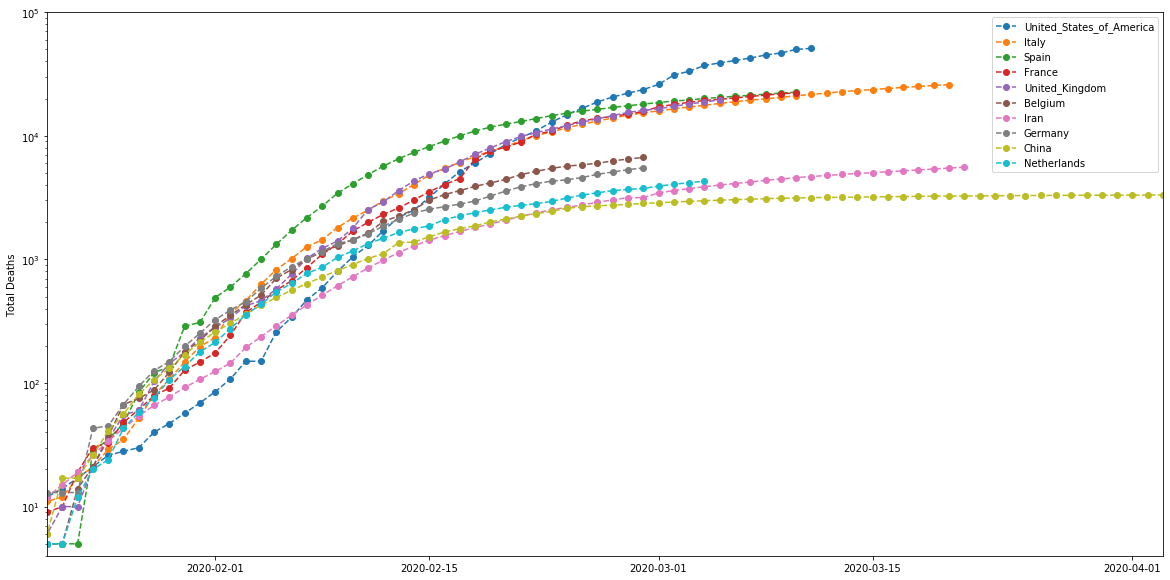

In [55]:
plt.figure(figsize=(20,10))
plt.plot(df_deaths_cum_shifted.iloc[:,:10],'o--')
plt.yscale('log')
plt.ylim([4,100000])
plt.ylabel("Total Deaths")
plt.xlim([china_date - dt.timedelta(days=3), china_date + dt.timedelta(days=70)])
plt.legend(df_deaths_cum.columns.values, loc=0);

In [56]:
# now let's have a look at the data for Italy to see if we can predict it going forward

import numpy as np
italy = df_deaths_cum['Italy']
italy = italy[italy > 20]
xdata = np.array(range(len(italy)))
ydata = np.array(italy,dtype=np.float128)

In [57]:
#see https://en.wikipedia.org/wiki/Generalised_logistic_function
def generalised_logistic(x, a, b, c, d, e):
     y = a / np.power(1 + b*np.exp(-c*(x+d)),1/e)
     #y = a / np.power(np.abs(1 + b*np.exp(-c*(x+d))),1/e)
     return y

# TODO: it might also be worth trying the even more general version of the equation: 
def generalised_logistic_2(x, a, b, c, d, e, f, g):
     y = a / np.power(f + b * np.exp( -c * (x + d) ),1/e) + g
     return y

In [58]:
# now let's fit the curve
from scipy.optimize import curve_fit

# reduce the importance of older data by an exponential decay factor:
decay = .94
# TODO: this value should be set empirically to minimise the forecast errors up to the current time 

# restrict the range of parameter values with upper and lower bounds
bounds =([0, 0, 0, -np.inf, 0], [np.inf, np.inf, np.inf, np.inf, np.inf])

# initial parameter settings (these were set after a bit of playing around with the data)
p0=[ydata.max(), 10, .1, 0, 1]

# estimate the model:
popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=False, bounds=bounds, p0=p0, maxfev=10000)

# print the parameters along with their error estimates
np.set_printoptions(linewidth=np.inf)
np.set_printoptions(suppress=True)
print("parameter estimates: ", popt)
print("standard error:      ", np.sqrt(np.diag(pcov)))

parameter estimates:  [32634.87601747    13.08700993     0.06031188   153.31733902     0.00018356]
standard error:       [ 566.89236062  518.76114694    0.00333154 4558.76977722    0.05210047]


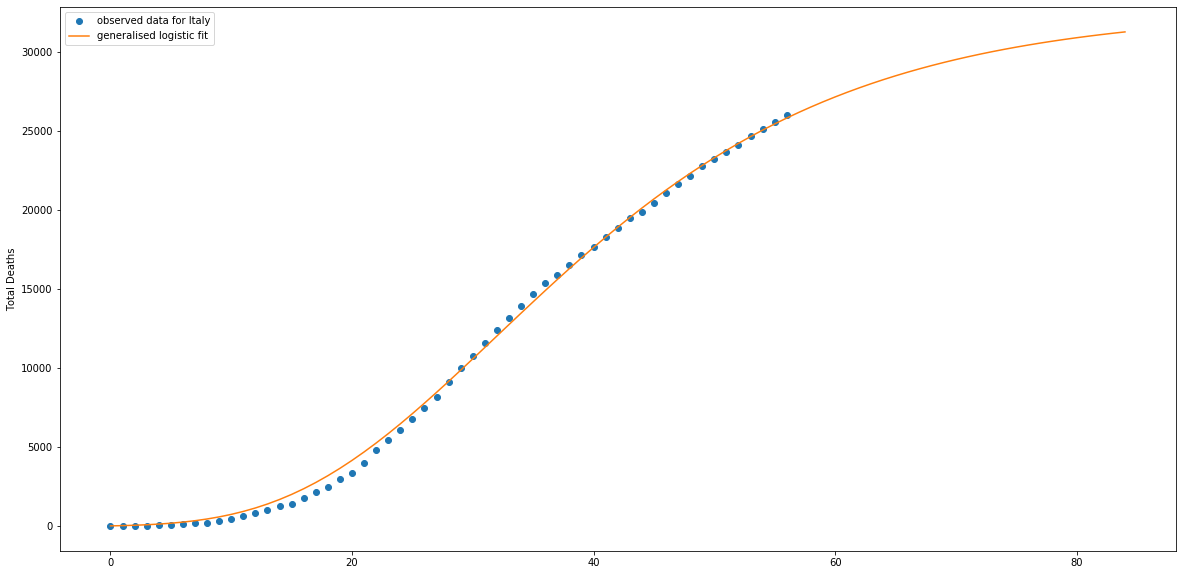

In [59]:
# plot the predictions

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
xpred = range(len(ydata)+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

In [60]:
# calculate the RMSE for the fit
error = ydata - generalised_logistic(xdata, *popt)
sse = np.power(error,2).sum()
mse = sse/len(error)
rmse = np.sqrt(mse)
rmse

328.79547923371369975

In [61]:
# calculate confidence bands using the delta-method:

# 1) use sympy to find gradient of function
from sympy import symbols,exp,lambdify

x, a, b, c, d, e = symbols('x a b c d e')
y = a / (1 + b*exp(-c*(x+d)))**(1/e)
dy_da = lambdify([x,[a,b,c,d,e]],y.diff(a))
dy_db = lambdify([x,[a,b,c,d,e]],y.diff(b))
dy_dc = lambdify([x,[a,b,c,d,e]],y.diff(c))
dy_dd = lambdify([x,[a,b,c,d,e]],y.diff(d))
dy_de = lambdify([x,[a,b,c,d,e]],y.diff(e))

def gradient(x, params):
    return [dy_da(x,params),dy_db(x,params),dy_dc(x,params),dy_dd(x,params),dy_de(x,params)] 

# 2) multiply gradient by covariance to compute variance of prediction \hat{y}
def variance_in_y_hat(x, params, cov):
    g = np.array(gradient(x,params)) 
    return g.dot(cov).dot(g)

# 3) scale by estimated standard deviation by critical value 1.96 to get 95% confidence interval
c = 1.96
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov)) for x in xpred]

# 4) finally, for a prediction interval, we need also to take into account the variance in y itself, (not just in \hat{y}), so add mse
intervals = [c * np.sqrt(variance_in_y_hat(x,popt,pcov) + mse) for x in xpred]

# TODO: improve these prediction bands: 
# (1) use the 95% critical value from t-distribution rather than gaussian (with  degree of freedom df=n-5), and sse/df instead of mse
# (2) check whether bounds need to increase with # steps into future
# (3) compare with bootstrap based estimates for the bounds

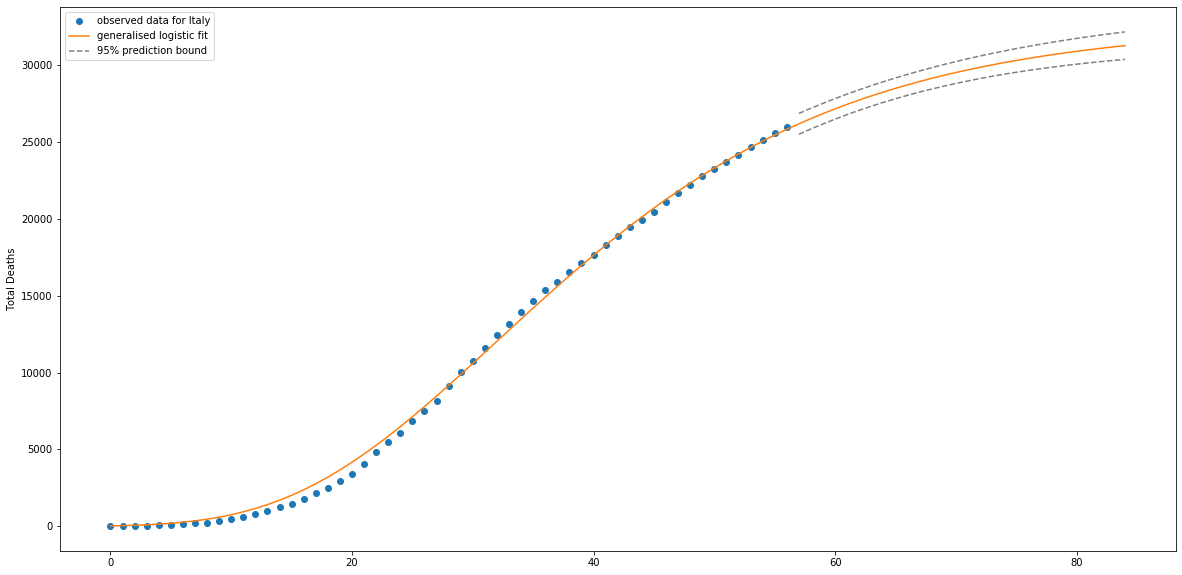

In [62]:
# plot the predictions with the prediction intervals
# NB: the interval GREATLY UNDERESTIMATES UNCERTAINTY 
# (since it assumes that the model is correct, which is almost certainly isn't)

plt.figure(figsize=(20,10))
plt.plot(xdata, ydata, 'o', label='observed data for Italy')
n = len(ydata)
xpred = range(n+28)
ypred = generalised_logistic(xpred, *popt)
plt.plot(xpred, ypred, label='generalised logistic fit')
plt.plot(xpred[n:], ypred[n:]+intervals[n:], '--', color='grey', label='95% prediction bound')
plt.plot(xpred[n:], ypred[n:]-intervals[n:], '--', color='grey')
plt.legend(loc='best')
plt.ylabel("Total Deaths");

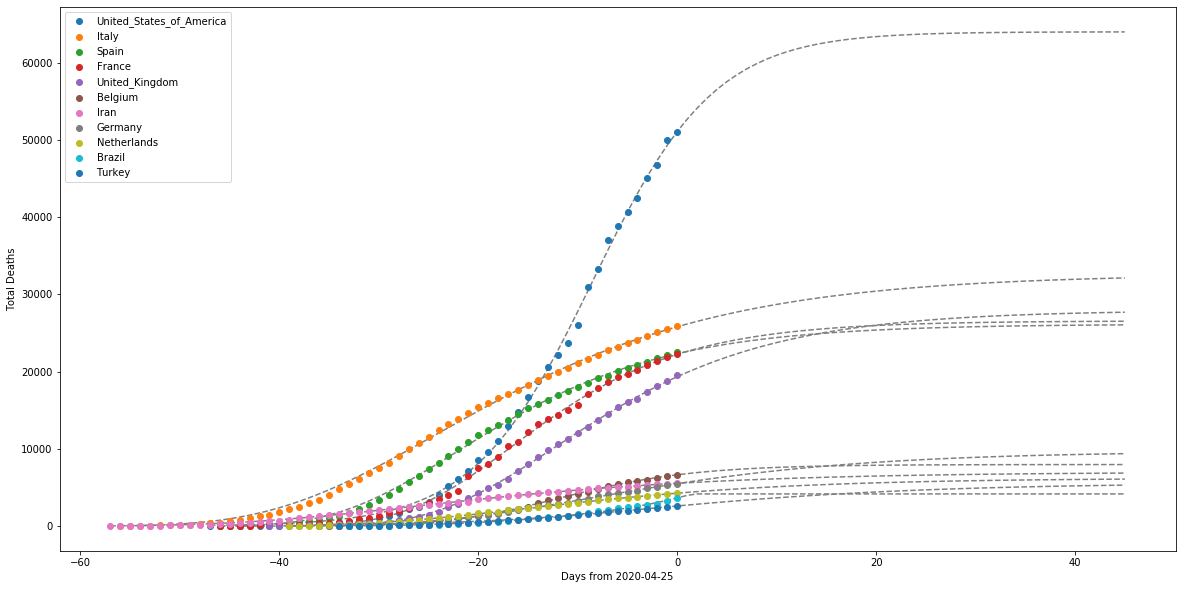

In [63]:
# plot other countries with high fatality counts

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:12]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[ydata.max(), 10, .1, 0, 1]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

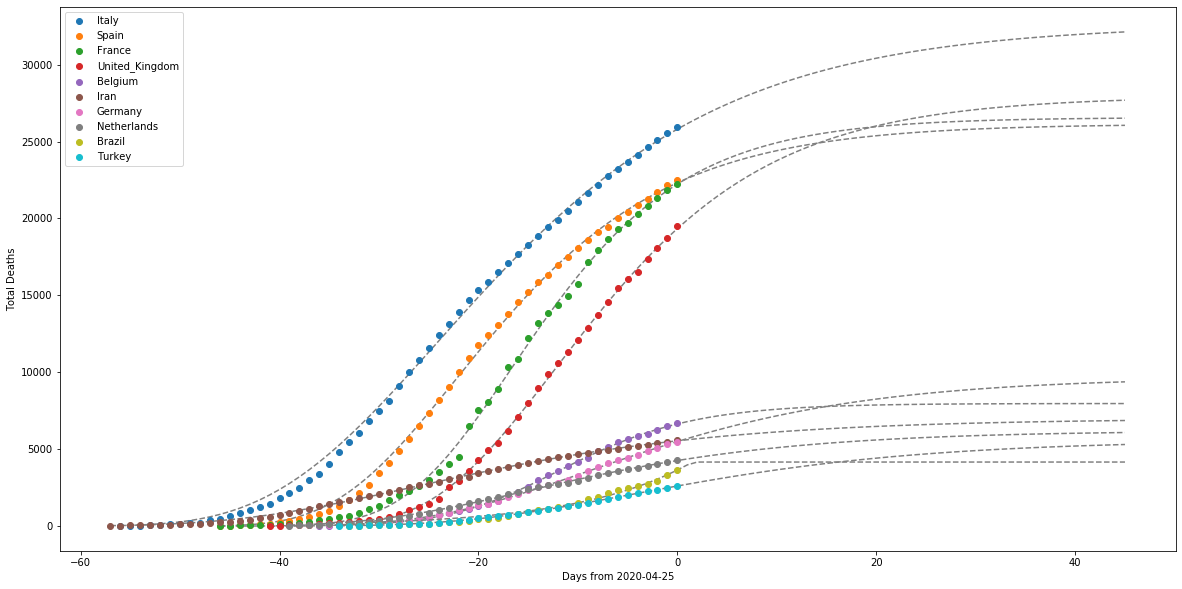

In [64]:
# remove the US to zoom in the y-axis on the previous plot

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,1:12]:
    if col=='China' :  # problem with recent china data
         continue      # so skip it
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[ydata.max(), 10, .1, 0, 1]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
#plt.ylim([0,30000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);

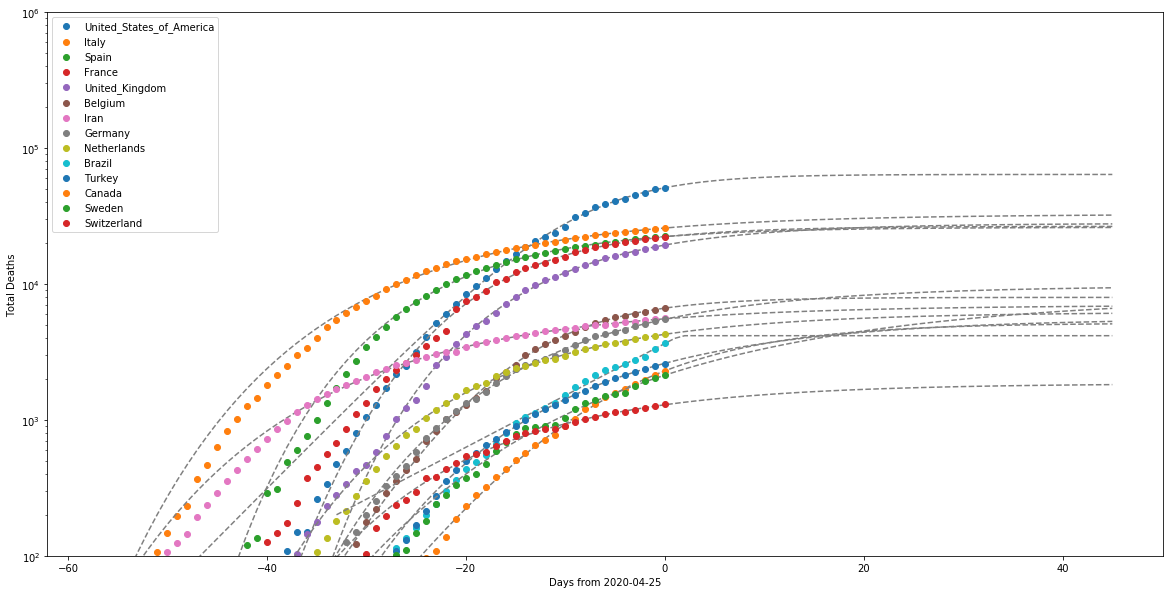

In [65]:
# log scale on the y-axis

plt.figure(figsize=(20,10))

for col in df_deaths_cum.iloc[:,:15]:
    if col=='China' :  # problem with recent china data, so skip it
        continue 
    ydata = df_deaths_cum[col]
    ydata = ydata[ydata > 20]
    xdata = np.array(range(len(ydata)))
    p0=[ydata.max(), 10, .1, 0, 1]
    popt, pcov = curve_fit(generalised_logistic, xdata, ydata, sigma=np.power(decay,np.array(range(len(ydata)))), absolute_sigma=True, bounds=bounds, p0=p0, maxfev=10000)
    xpred = np.array(range(len(ydata)+45))
    ypred = generalised_logistic(xpred, *popt)
    offset = -len(ydata)+1
    plt.plot(xpred+offset, ypred, '--', color='grey')
    plt.plot(xdata+offset, ydata, 'o', label=col)
    
plt.ylabel("Total Deaths")
plt.yscale('log')
plt.ylim([100,1000000])
plt.xlabel("Days from "+str(df0['dateRep'].max().date()))
plt.legend(loc=0);